In [8]:
#Script to compare against price human DRGs and cultured DRGs
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# import tpms and pain genes
mean_tpm_iPSC = pd.read_csv("../files/tpm_expressed_mrnas/tpm_all.csv", delimiter = ",")
mean_tpm_DRG = pd.read_excel("../files/datasets/Pain_Genes/pain_genes.xlsx", sheet_name = "Sheet 1", skiprows =3)

In [9]:
# preprocessing the Data, setting index 
mean_tpm_DRG = mean_tpm_DRG.iloc[3:,:]
mean_tpm_DRG_index = mean_tpm_DRG.set_index("ensembl gene name")
mean_tpm_DRG_index = mean_tpm_DRG_index.iloc[:,11:-1].drop("Consistently detectable in acutely dissociated DRGs ?", axis = 1)

In [15]:
# merging the tables of consensus genes between price and zeidler
mean_tpm_ipsc_index = mean_tpm_iPSC.set_index("gene_name")
gesamt_dataframe = pd.merge(mean_tpm_DRG_index, mean_tpm_ipsc_index, how = "inner", left_index = True, right_index = True)

In [6]:
#check the table
gesamt_dataframe.max()

hDIV4-1F      11882.200000
hDIV4-1Fre    12727.200000
hDIV4-2F      14661.600000
hDIV4-3M      11215.400000
hDIV4-4M      12465.600000
                  ...     
840 D26_2      9527.965553
840 D26_3      7868.825038
840 D36_1      7283.878090
840 D36_2      7559.663973
840 D36_3      8335.735175
Length: 68, dtype: float64

In [16]:
#only consider tpms above 0.5 in cultured neurons
gesamt_dataframe = gesamt_dataframe[gesamt_dataframe["hDIV4-3M"] > 0.5]
#gesamt_dataframe = gesamt_dataframe.transform(lambda x: np.log2(x)) # use this for log2 scaling
#gesamt_dataframe.to_csv("tpm_adjusted_R.csv")

In [12]:
gesamt_dataframe.max()

hDIV4-1F      13.536514
hDIV4-1Fre    13.635627
hDIV4-2F      13.839755
hDIV4-3M      13.453193
hDIV4-4M      13.605665
                ...    
840 D26_2     13.217952
840 D26_3     12.941933
840 D36_1     12.830491
840 D36_2     12.884106
840 D36_3     13.025094
Length: 68, dtype: float64

In [17]:
# make correlation analysis using spearman correlation
import numpy as np
gesamt_corr = gesamt_dataframe.corr(method = "spearman")
gesamt_corr = gesamt_corr.iloc[:14,15:]
gesamt_corr

,AD3 D0_2,AD3 D0_3,AD3 D5_1,AD3 D5_2,AD3 D5_3,AD3 D9_1,AD3 D9_2,AD3 D9_3,AD3 D16_1,AD3 D16_2,...,840 D9_3,840 D16_1,840 D16_2,840 D16_3,840 D26_1,840 D26_2,840 D26_3,840 D36_1,840 D36_2,840 D36_3
hDIV4-1F,0.577276,0.579618,0.577180,0.577308,0.580882,0.563006,0.569835,0.564604,0.575708,0.572111,...,0.555117,0.562809,0.568678,0.567595,0.572598,0.572431,0.571058,0.552332,0.550327,0.552358
hDIV4-1Fre,0.571696,0.573843,0.572957,0.573900,0.577574,0.560495,0.567032,0.561883,0.572327,0.568151,...,0.549477,0.558065,0.564956,0.561838,0.566798,0.566179,0.565949,0.547874,0.544997,0.546767
hDIV4-2F,0.580342,0.582258,0.580053,0.579765,0.582643,0.580089,0.584188,0.581273,0.623459,0.621591,...,0.572114,0.609158,0.613045,0.612572,0.626338,0.623915,0.627296,0.616313,0.613659,0.611603
hDIV4-3M,0.582477,0.584956,0.581593,0.581188,0.584449,0.575977,0.580705,0.577191,0.609572,0.607497,...,0.568287,0.595041,0.599264,0.598777,0.617989,0.616222,0.617528,0.603072,0.601674,0.599945
hDIV4-4M,0.575047,0.576981,0.573387,0.573949,0.577051,0.572905,0.577189,0.574399,0.612181,0.609673,...,0.563493,0.596808,0.602160,0.599541,0.622514,0.619475,0.623557,0.612659,0.609742,0.606838
hDIV4-5F,0.561458,0.564701,0.555177,0.551674,0.553690,0.555060,0.560437,0.556359,0.603527,0.604474,...,0.554440,0.593889,0.593142,0.598971,0.624747,0.624543,0.623871,0.611061,0.613198,0.612353
hDIV4-6M,0.572425,0.574192,0.573826,0.573346,0.575780,0.570866,0.574784,0.571850,0.612758,0.610933,...,0.563146,0.597274,0.601021,0.600621,0.622374,0.619127,0.623553,0.610450,0.608518,0.604588
hDRG-1F,0.425833,0.425443,0.430431,0.428580,0.425810,0.449425,0.449884,0.451360,0.515617,0.519958,...,0.453513,0.513923,0.508827,0.514762,0.555684,0.551235,0.558333,0.564647,0.565828,0.563978
hDRG-1Fre,0.427418,0.426455,0.432652,0.432793,0.430436,0.453315,0.453450,0.455560,0.515299,0.518363,...,0.453618,0.512005,0.508744,0.511284,0.550920,0.545183,0.554283,0.562779,0.562059,0.559654
hDRG-2F,0.441662,0.441523,0.444204,0.443542,0.441087,0.463502,0.464279,0.465707,0.529601,0.532723,...,0.464209,0.525785,0.522677,0.525697,0.565702,0.560562,0.568531,0.576825,0.576242,0.573991


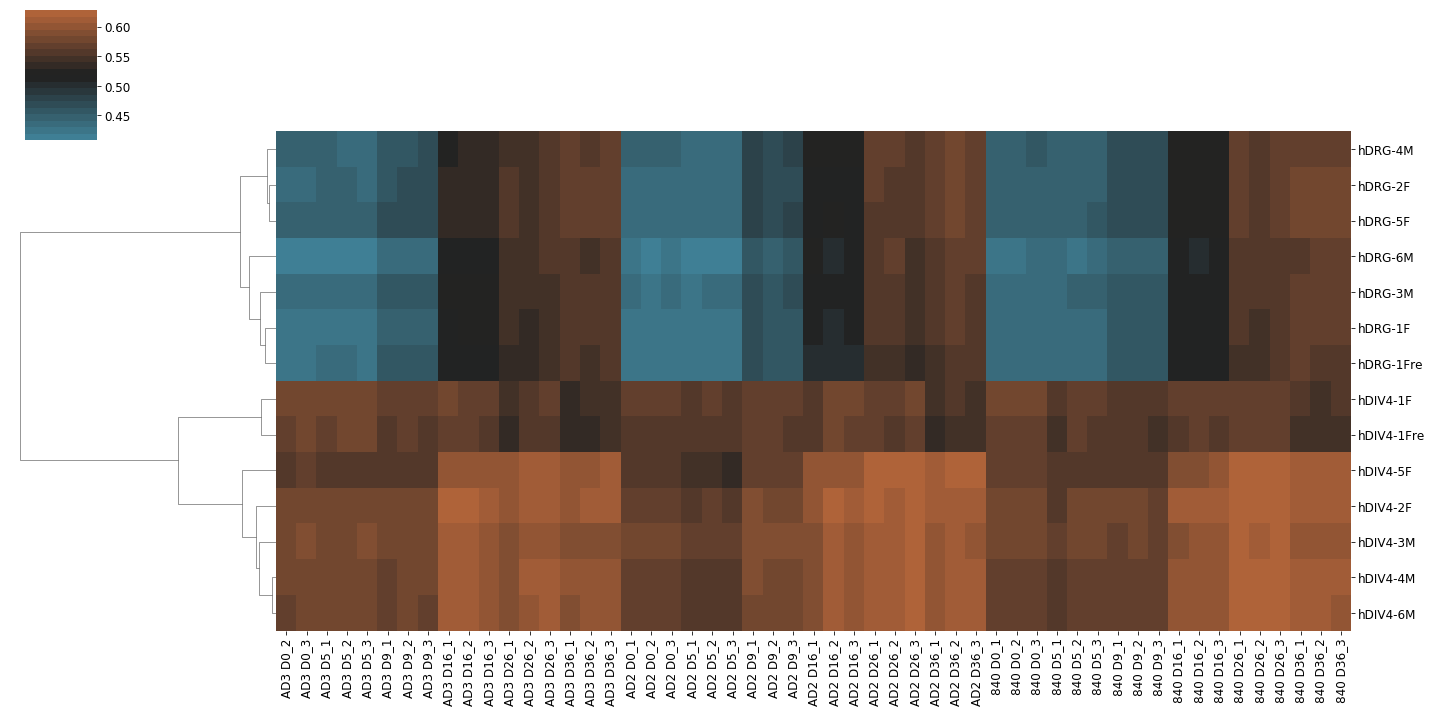

In [18]:
#draw and save the heatmap
plt.rcParams['svg.fonttype'] = 'none'
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
sns.clustermap(gesamt_corr,cmap = sns.diverging_palette(222, 30, l=50, n=20, center="dark"), col_cluster = False, figsize = (20,10))
#plt.savefig("Clustermap_ted_price_samples.svg", quality = 90, transparent = True, dpi = 500)